# Autoencoders

An autoencoder is a neural network where the output is supposed to be the same as the input. That's why it is called "auto" "encoder".

![autoencoder](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

Yep, a neural network that just takes a picture of a cat and outputs the very same picture of a cat. Eee gat! Eee gat! What good is that?

Well, it can be very useful.

Let's take our standard MNIST dataset. It is a set of 28x28 images-- so 784 dimensions for each image. That's a lot of neurons for our input layer of the neural network. It would be nice if we could reduce the dimensions to make the network training go faster.

Principal components analysis is what we've used in the past to reduce the dimensionality. In PCA, we are finding a linear way of reconstructing the images from a smaller set of dimensions (i.e. can 32 dimensions be used to reconstruct the original 784).

Autoencoders are a non-linear (and can be linear) way of dimensionality reduction. I should be fair and note that this dimensionality reduction is fairly specific. For example, if I train an autoencoder to reduce images of handwritten numbers (MNIST) there's no reason to think it would work as well on images of cats. So I wouldn't recommend autoencoders as a generic method to use for simply compressing data. But it can be quite good if you are dealing with the same type of data. 

Hinton has a very good [paper](https://pdfs.semanticscholar.org/7d76/b71b700846901ac4ac119403aa737a285e36.pdf) showing how deep autoencoders can be used to separate data and make classification easier.


In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import regularizers

Using TensorFlow backend.


# MNIST

Let's apply a simple autoencoder to the MNIST dataset.

In [2]:
from keras.datasets import mnist
import numpy as np

In [3]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data

Let's scale the data between 0 and 1. Then we'll unwrap the 28x28 matrix into a 784 vector.

In [5]:
# Normalize images between 0 and 1 (rather than 0 to 255)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the matrix to 1 x 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


# Encode to a reduce number of dimensions

Let's get this down to 32 features from the original 784

In [6]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Create autoencoder model

So there are 3 layers:
1. The input layer that is 784 neurons
2. The "encoding" layer that is 32 neurons.
3. The "decoding" layer that is 784 neurons


In [7]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
reg = regularizers.l1(10e-7)
#reg = None

encoded = Dense(encoding_dim, activation='relu',
                 activity_regularizer=reg)(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks = [  # Extra functions called during training
                             EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.2970 - val_loss: 0.2045
Epoch 2/100
60000/60000 [==============================] - 0s - loss: 0.1855 - val_loss: 0.1692
Epoch 3/100
60000/60000 [==============================] - 0s - loss: 0.1615 - val_loss: 0.1525
Epoch 4/100
60000/60000 [==============================] - 0s - loss: 0.1481 - val_loss: 0.1416
Epoch 5/100
60000/60000 [==============================] - 0s - loss: 0.1390 - val_loss: 0.1339
Epoch 6/100
60000/60000 [==============================] - 0s - loss: 0.1322 - val_loss: 0.1280
Epoch 7/100
60000/60000 [==============================] - 0s - loss: 0.1268 - val_loss: 0.1234
Epoch 8/100
60000/60000 [==============================] - 0s - loss: 0.1228 - val_loss: 0.1199
Epoch 9/100
60000/60000 [==============================] - 0s - loss: 0.1198 - val_loss: 0.1173
Epoch 10/100
60000/60000 [==============================] - 0s - loss: 0.1176 - val_lo

60000/60000 [==============================] - 0s - loss: 0.1002 - val_loss: 0.0991
Epoch 86/100
60000/60000 [==============================] - 0s - loss: 0.1001 - val_loss: 0.0990
Epoch 87/100
60000/60000 [==============================] - 0s - loss: 0.1001 - val_loss: 0.0990
Epoch 88/100
60000/60000 [==============================] - 0s - loss: 0.1000 - val_loss: 0.0990
Epoch 89/100
60000/60000 [==============================] - 0s - loss: 0.1000 - val_loss: 0.0990
Epoch 90/100
60000/60000 [==============================] - 0s - loss: 0.1000 - val_loss: 0.0989
Epoch 91/100
60000/60000 [==============================] - 0s - loss: 0.0999 - val_loss: 0.0989
Epoch 92/100
60000/60000 [==============================] - 0s - loss: 0.0999 - val_loss: 0.0990
Epoch 93/100
60000/60000 [==============================] - 0s - loss: 0.0998 - val_loss: 0.0988
Epoch 94/100
60000/60000 [==============================] - 0s - loss: 0.0998 - val_loss: 0.0988
Epoch 95/100
60000/60000 [=================

In [13]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

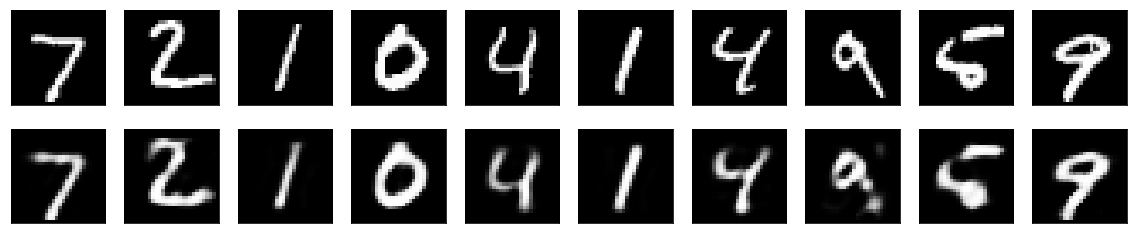

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Sparsity

We can measure the sparsity of the encoder matrix by just getting the mean value. So here we calculate the mean value of the 32 dimensions for all 10,000 test examples. The smaller the number, the more sparse the encoding.

In [15]:
encoded_imgs[24,:]  # Weights for test image 24

array([ 0.69182253,  0.        ,  1.00263691,  0.10057664,  0.85748416,
        0.38706851,  0.74713916,  0.28912231,  0.90457207,  0.59719551,
        0.28239521,  0.74126256,  0.80670613,  0.60838544,  0.31535879,
        0.21921009,  1.14437616,  0.55015767,  0.77234882,  0.73497182,
        0.50360519,  0.94996983,  0.89061826,  0.21475574,  1.06839347,
        1.40127969,  0.7531997 ,  0.64178181,  0.20284069,  0.47237492,
        0.40927809,  0.02662843], dtype=float32)

In [16]:
encoded_imgs.mean()

0.72388303

# Comparing autoencoders to PCA

These are comparisons made in Hinton's [2006 paper](https://pdfs.semanticscholar.org/7d76/b71b700846901ac4ac119403aa737a285e36.pdf).

It's not simply that autoencoders can reduce dimensionality. What Hinton shows is that the dimensions allow different classes to be "pushed" apart. It makes classification easier.

![mnist](http://nikhilbuduma.com/img/autoencoder_digit_exp.png)
Plotting first two dimensions of the MNIST dataset. Left: PCA, Right: Autoencoder

<br>
<br>
<br>

![gold](http://nikhilbuduma.com/img/autoencoder_nlp_exp.png)
Plotting first two dimensions of economic dataset. Left: PCA, Right: Autoencoder

<br><br><br>

![faces](http://nikhilbuduma.com/img/autoencoder_face_exp.png)
Top row = Original image,
Middle row = 30 dimensional autoencoder reconstruction,
Bottom row = 30 dimensional PCA reconstruction
